A[0] : First/input layer = x
z1 : Unactivated first layer = W * A[0] + b[1] /// Weights*Input + bias  or z1 = (w*x) + b
Activation Function : Sigmoid function // ReLu {rectified linear unit} : {
    x if x>0
    0 if x<=0
}

A[1] : Activated First Layer = ReLu(z1)

z2 : Unactivated second Layer = W2 * A[1] + b[2]
Activation Function = Softmax : {
    e[z_i]/Summation{j=1 ~ K} e[z_j]
}
A[2] = softmax(z2) {Probabilities}

BackProp to fix biases and weights--

dz2 : Error of second layer = A[2] - Y
dW2 : Derivative of cost function w.r.t. weights in layer 2 
db[2] : Average of absolute error for layer 2
dz1 : 
dw1 :
db[1] :

Update params
W1 = W1 - a*dW1
a : Learning Rate {Hyperparameter : Set by Coder(Us)}

// After all this run whole shit again




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


C:\Users\Shikhar\AppData\Local\Temp\ipykernel_3272\579097343.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [42]:
df = pd.read_csv("C:\\Users\\Shikhar\\OneDrive\\Desktop\\train.csv")


In [34]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Training with learning rate: 0.1
Iteration 0, Accuracy 0.08597560975609755, Loss 2.4168921128154053
Iteration 50, Accuracy 0.8420243902439024, Loss 0.6596031571436151
Iteration 100, Accuracy 0.8778780487804878, Loss 0.4663563928350134
Iteration 150, Accuracy 0.891609756097561, Loss 0.3976266988076221
Iteration 200, Accuracy 0.9003414634146342, Loss 0.3601496230771829
Iteration 250, Accuracy 0.906, Loss 0.335398742733171
Iteration 300, Accuracy 0.9109024390243903, Loss 0.3171238774898381
Iteration 350, Accuracy 0.9149756097560976, Loss 0.3026227848083946
Iteration 400, Accuracy 0.9181463414634147, Loss 0.2905200247217718
Iteration 450, Accuracy 0.9209512195121952, Loss 0.2800318107422159
Iteration 500, Accuracy 0.923829268292683, Loss 0.2707393042881313
Iteration 550, Accuracy 0.9261219512195122, Loss 0.26233270029795663
Iteration 600, Accuracy 0.9282439024390244, Loss 0.2546186136851099
Iteration 650, Accuracy 0.930219512195122, Loss 0.2474743510515513
Iteration 700, Accuracy 0.9323414

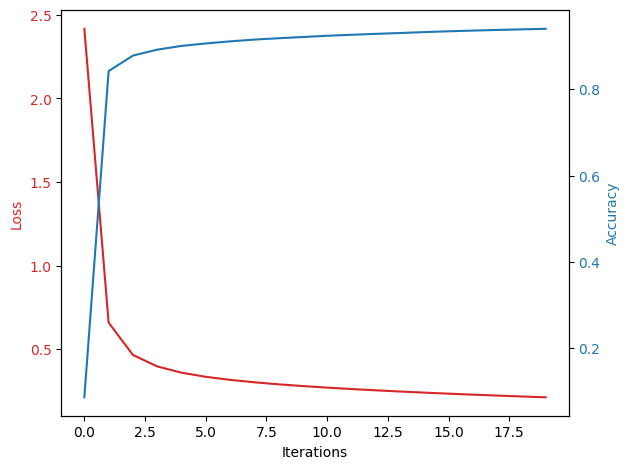

Development set accuracy: 0.941
Development set loss: 0.21672195952040357


In [45]:
def init_params():
    w1 = np.random.randn(128, 784) * np.sqrt(2 / 784)
    b1 = np.zeros((128, 1))
    w2 = np.random.randn(10, 128) * np.sqrt(2 / 128)
    b2 = np.zeros((10, 1))
    return w1, b1, w2, b2

def ReLu(z):
    return np.maximum(0, z)

def derivative_relu(z):
    return z > 0

def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=0, keepdims=True))
    return exp_z / np.sum(exp_z, axis=0, keepdims=True)

def cross_entropy_loss(a2, y_new):
    m = y_new.shape[1]
    log_likelihood = -np.log(a2[y_new.argmax(axis=0), np.arange(m)])
    loss = np.sum(log_likelihood) / m
    return loss

def forward(x, w1, b1, w2, b2):
    z1 = w1.dot(x) + b1
    a1 = ReLu(z1)
    z2 = w2.dot(a1) + b2
    a2 = softmax(z2)
    return z1, a1, z2, a2

def fun(y):
    y_new = np.zeros((y.size, y.max() + 1))
    y_new[np.arange(y.size), y] = 1
    y_new = y_new.T
    return y_new

def backpropagation(z1, a1, z2, a2, w2, x, y):
    m = y.size
    y_new = fun(y)
    dz2 = a2 - y_new
    dw2 = (1 / m) * dz2.dot(a1.T)
    db2 = (1 / m) * np.sum(dz2, axis=1, keepdims=True)
    dz1 = w2.T.dot(dz2) * derivative_relu(z1)
    dw1 = (1 / m) * dz1.dot(x.T)
    db1 = (1 / m) * np.sum(dz1, axis=1, keepdims=True)
    return db1, dw1, db2, dw2

def update_w_and_b(w1, b1, w2, b2, db1, dw1, db2, dw2, lr):
    w1 -= lr * dw1
    b1 -= lr * db1
    w2 -= lr * dw2
    b2 -= lr * db2
    return w1, b1, w2, b2

def get_accuracy(pred, y):
    return np.sum(pred == y) / y.size

def get_predictions(y):
    return np.argmax(y, axis=0)

def plot_learning_curves(losses, accuracies):
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('Iterations')
    ax1.set_ylabel('Loss', color=color)
    ax1.plot(losses, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  
    color = 'tab:blue'
    ax2.set_ylabel('Accuracy', color=color)  
    ax2.plot(accuracies, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  
    plt.show()

def grad_desc(x, y, iter, lr):
    w1, b1, w2, b2 = init_params()
    losses = []
    accuracies = []
    for i in range(iter):
        z1, a1, z2, a2 = forward(x, w1, b1, w2, b2)
        loss = cross_entropy_loss(a2, fun(y))
        if i % 50 == 0:
            accuracy = get_accuracy(get_predictions(a2), y)
            print(f"Iteration {i}, Accuracy {accuracy}, Loss {loss}")
            losses.append(loss)
            accuracies.append(accuracy)
        db1, dw1, db2, dw2 = backpropagation(z1, a1, z2, a2, w2, x, y)
        w1, b1, w2, b2 = update_w_and_b(w1, b1, w2, b2, db1, dw1, db2, dw2, lr)
    plot_learning_curves(losses, accuracies)
    return w1, b1, w2, b2

# Data preparation
data = np.array(df)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
y_dev = data_dev[0]
x_dev = data_dev[1:n]

data_train = data[1000:m].T
y_train = data_train[0]
x_train = data_train[1:n]

x_train = x_train / 255.0
x_dev = x_dev / 255.0

# Train with the best learning rate
best_lr = 0.1
print(f"Training with learning rate: {best_lr}")
w1, b1, w2, b2 = grad_desc(x_train, y_train, iter=1000, lr=best_lr)

# Evaluate on development set
z1, a1, z2, a2 = forward(x_dev, w1, b1, w2, b2)
dev_accuracy = get_accuracy(get_predictions(a2), y_dev)
print(f"Development set accuracy: {dev_accuracy}")
dev_loss = cross_entropy_loss(a2, fun(y_dev))
print(f"Development set loss: {dev_loss}")
